In [184]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [185]:
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [186]:
display_step = 1

In [187]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])


In [188]:
W1 = tf.Variable(tf.random_normal([784, 400], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))


In [189]:
W2 = tf.Variable(tf.random_normal([400, 254], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))

In [190]:
W3 = tf.Variable(tf.random_normal([254, 254], stddev = 0.01))
L3 = tf.nn.relu(tf.matmul(L2, W3))

In [191]:
W4 = tf.Variable(tf.random_normal([254, 254], stddev = 0.01))
L4 = tf.nn.relu(tf.matmul(L3, W4))

In [192]:
W5 = tf.Variable(tf.random_normal([254, 10], stddev = 0.01))

In [193]:
model = tf.matmul(L4, W5)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model, labels=Y))
optimizer = tf.train.AdamOptimizer(0.01).minimize(cost)
avg_set=[]
epoch_set=[]

In [194]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)


In [195]:
batch_size = 100
total_batch = int(mnist.train.num_examples / batch_size)

Epoch: 0001 Avg. cost = 0.461
Epoch: 0002 Avg. cost = 0.188
Epoch: 0003 Avg. cost = 0.155
Epoch: 0004 Avg. cost = 0.134
Epoch: 0005 Avg. cost = 0.132
Epoch: 0006 Avg. cost = 0.110
Epoch: 0007 Avg. cost = 0.107
Epoch: 0008 Avg. cost = 0.100
Epoch: 0009 Avg. cost = 0.103
Epoch: 0010 Avg. cost = 0.092
Epoch: 0011 Avg. cost = 0.079
Epoch: 0012 Avg. cost = 0.079
Epoch: 0013 Avg. cost = 0.078
Epoch: 0014 Avg. cost = 0.096
Epoch: 0015 Avg. cost = 0.095
최적화완료!


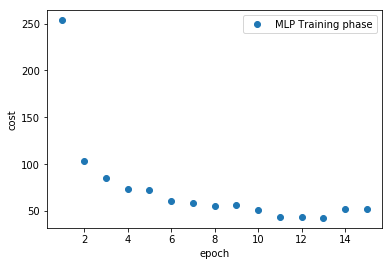

In [196]:
for epoch in range(15):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys =  mnist.train.next_batch(batch_size)
        
        _, cost_val = sess.run([optimizer, cost], feed_dict={X: batch_xs, Y: batch_ys})
        total_cost += cost_val
        
    print('Epoch:', '%04d' % (epoch +1),
     'Avg. cost =', '{:.3f}'.format(total_cost / total_batch))
    avg_set.append(total_cost)
    epoch_set.append(epoch+1)
    
    
print('최적화완료!')
plt.plot(epoch_set, avg_set, 'o', label='MLP Training phase')
plt.ylabel('cost')
plt.xlabel('epoch')
plt.legend()
plt.show()
    

In [197]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
print('정확도 : ', sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels}))

정확도 :  0.9714
